In [56]:
%load_ext autoreload
%autoreload 2

from CNS_SA_util import *
from util_0730 import draw_route_solution3, reassign_riders
from CNS_SA_myalgorithm import algorithm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 시우님 코드 확인

In [55]:

# problem_file = r'C:\Users\hsh80\Desktop\LG CNS\stage1_problems\STAGE1_5.json'
problem_file = '../alg_test_problems_20240429/TEST_K200_1.json'

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

inf = float('inf')

init_availables = [rider.available_number for rider in ALL_RIDERS]

timelimit = 60

for v in ALL_RIDERS:
    print(v)

print(K)

Rider([BIKE, 5.291005291005291, 100, 60, 5000, 120, 40])
Rider([WALK, 1.3227513227513228, 70, 30, 5000, 120, 60])
Rider([CAR, 4.2328042328042335, 200, 100, 5000, 180, 200])
200


merge iter cnt : 2
time taken to merge: 7.827009916305542
4390 4270 99002500 9.90025 -12.145854902653912 5.310338895314135e-06
4277 4270 98507487 9.85074875 -0.6711164976163835 0.5111375751999904
changed
4279 4277 98014950 9.801495006249999 -0.2172117619448096 0.8047595338157781
changed
4276 4257 96552064 9.65520646809484 -1.9616359383495223 0.14062817361495686
4215 4193 95111013 9.511101304657718 -2.395148497560837 0.09115914100736147
4206 4193 94635457 9.46354579813443 -1.4548458150553945 0.23343635349778602
changed
4226 4206 94162280 9.416228069143758 -2.1211253437508595 0.11989662764384432
4309 4192 92756896 9.275689688183277 -12.581652030541127 3.4344559450970565e-06
4209 4192 92293112 9.22931123974236 -1.803601543777216 0.1647046278091283
4191 4170 91372488 9.137248860125931 -2.3546474797123786 0.09492696431776727
4173 4170 90915626 9.091562615825302 -0.34658508478124833 0.7070986533934617
4123 4118 88222024 8.822202429488012 -0.5014620822134911 0.6056445099928615
changed
4119 41

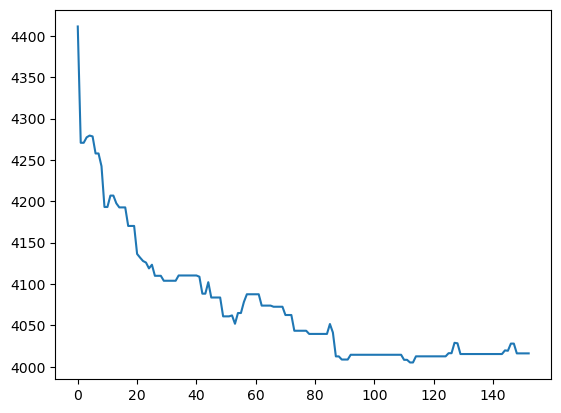

In [58]:
## -------------- 솔루션 제작 및 실현 가능성 확인 코드 ---------------- 

solution, all_bundles = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

print(checked_solution['avg_cost'])

In [51]:
from collections import Counter

Counter([len(v[1]) for v in checked_solution['bundles']])

Counter({2: 47, 3: 28, 1: 10, 4: 3})

In [52]:
from collections import Counter

Counter([len(v[1]) for v in checked_solution['bundles']])

Counter({2: 47, 3: 28, 1: 10, 4: 3})

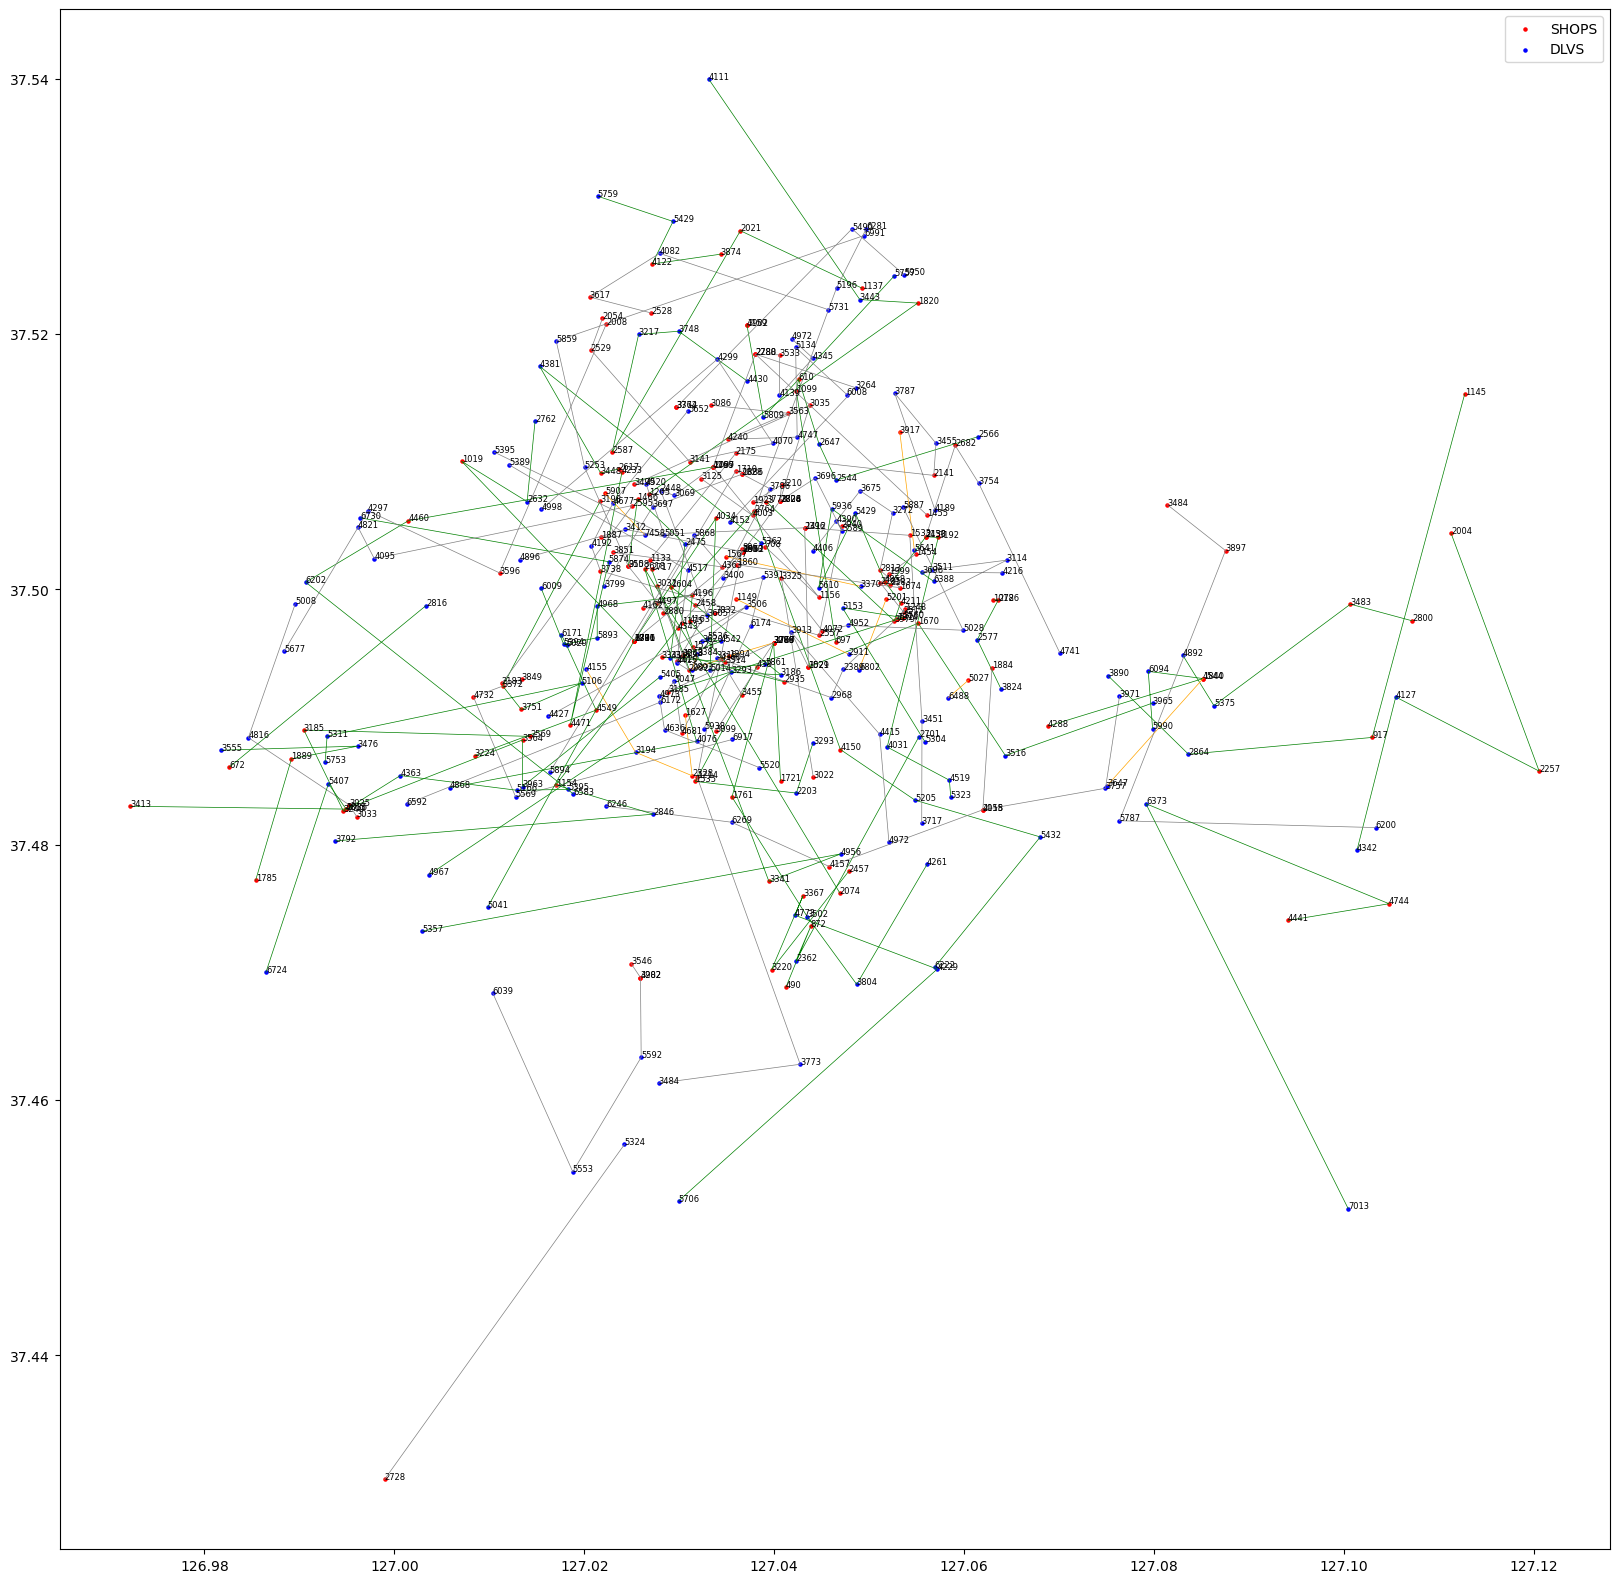

In [53]:
draw_route_solution3(ALL_ORDERS, checked_solution)

In [60]:
all_bundles, rider_availables = reassign_riders(K, ALL_ORDERS, ALL_RIDERS, DIST, init_availables, all_bundles)
for rider_i in range(3):
    ALL_RIDERS[rider_i].available_number = rider_availables[rider_i]

solution = [
        # rider type, shop_seq, dlv_seq
        [bundle.rider.type, bundle.shop_seq, bundle.dlv_seq]
        for bundle in all_bundles
]

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

print(checked_solution['avg_cost'])

3882.0405


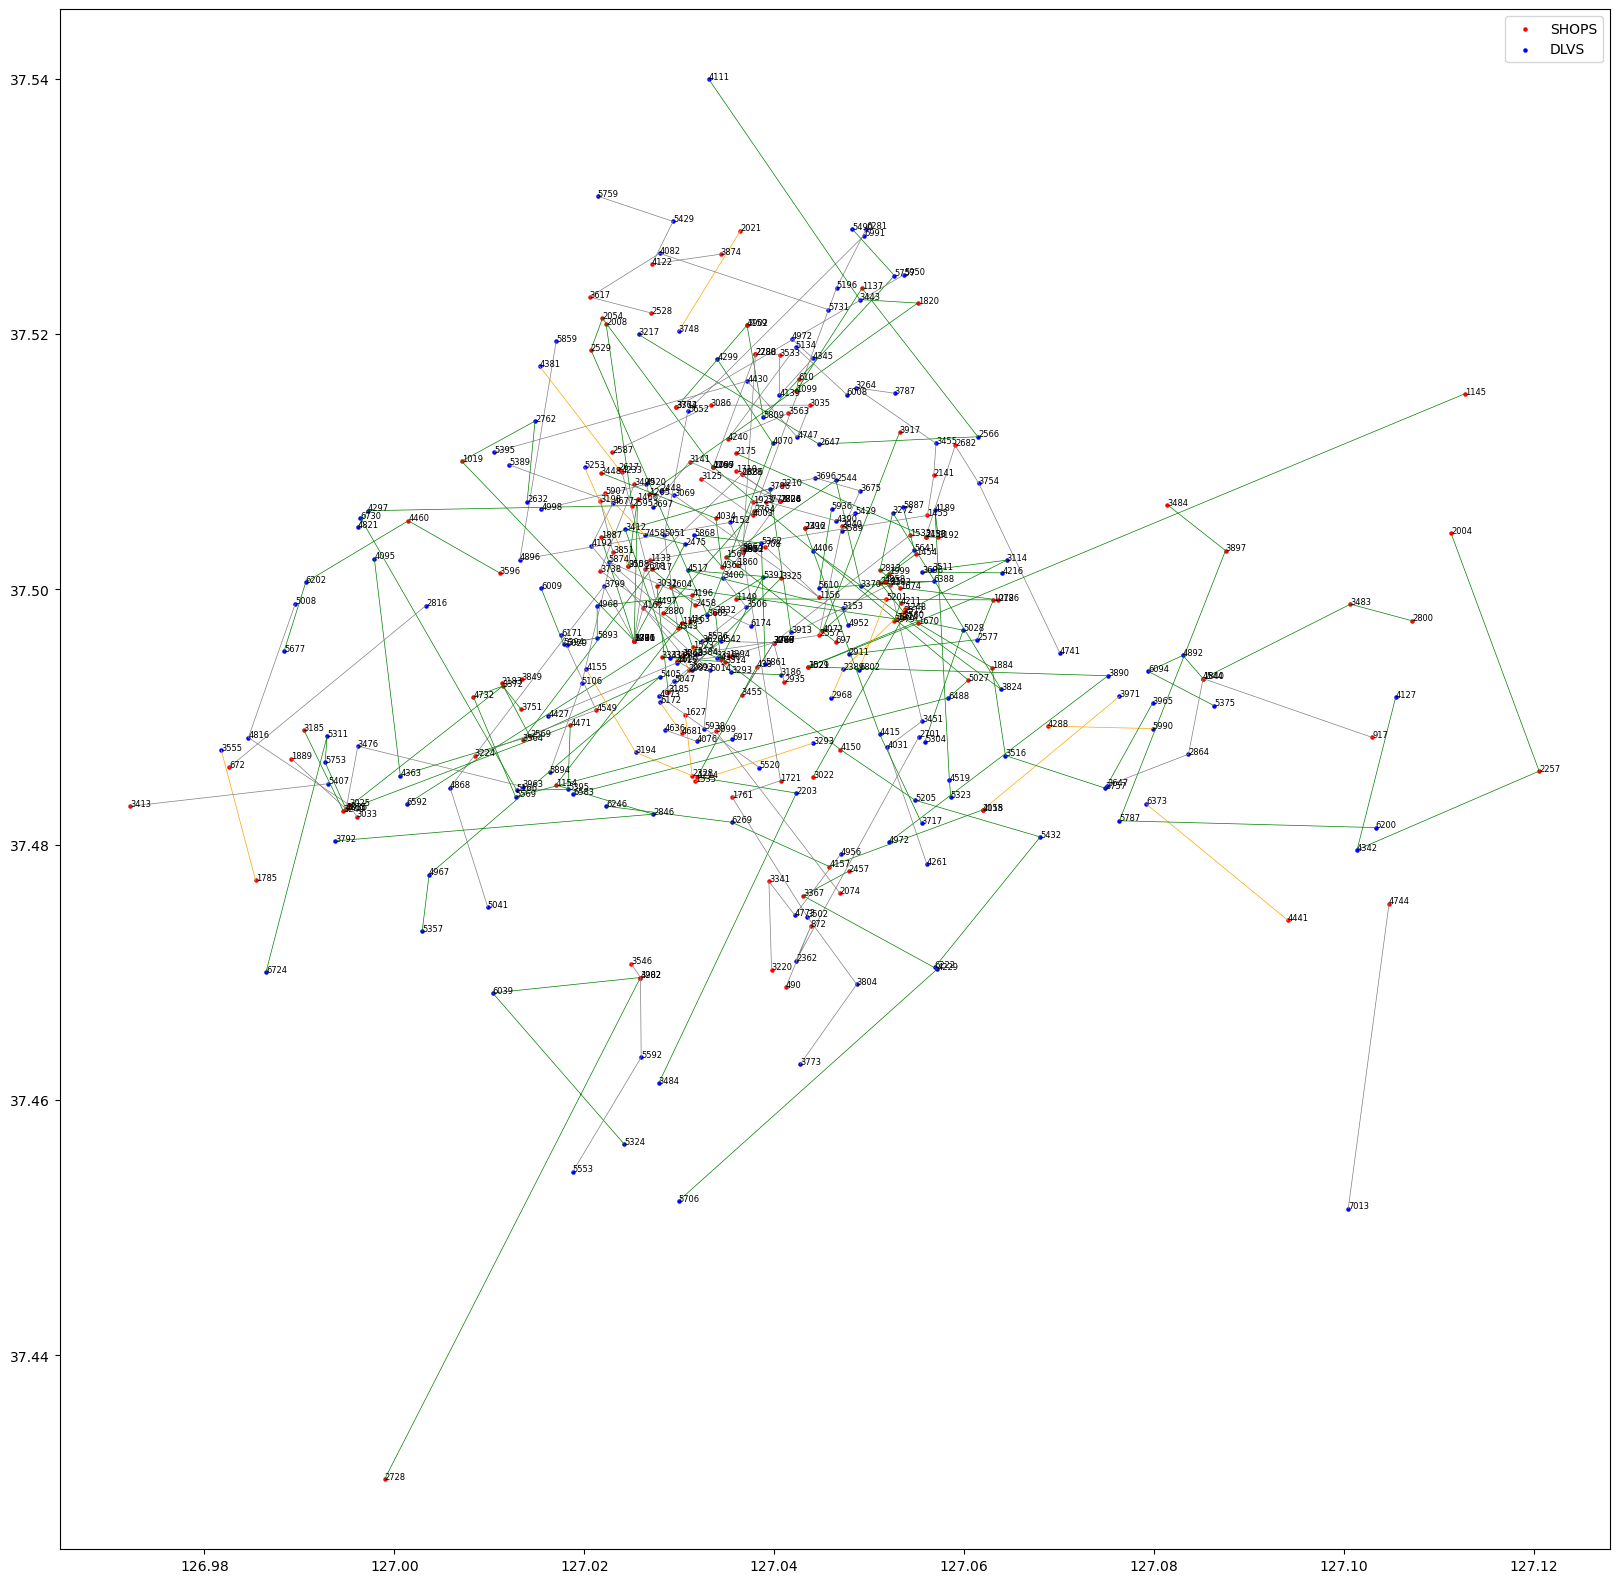

In [61]:
draw_route_solution3(ALL_ORDERS, checked_solution)